In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import pandas as pd

In [2]:
saveState = False
regMethodDir = "gradient"
regMethod = ""

if regMethodDir == "gradient":
    regMethod = "Gradientní sestup"
elif regMethodDir == "gradientline":
    regMethod = "Gradientní sestup se zlatým řezem"
elif regMethodDir == "gradientlbf":
    regMethod = "BFGS s omezenou pamětí"
    
view = "ap"
colors = list(mcolors.TABLEAU_COLORS.values())
patNumbers = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
pd.set_option("display.precision", 3, "styler.format.decimal", ",")

initialErrors = np.zeros(shape=(12, 2, 10))
lastIterErrors = np.zeros(shape=(12, 3, 10))
# gradientLineErrors = np.zeros(shape=(10, 12))
# gradientLbfErrors = np.zeros(shape=(10, 12))

# gradientMeanErrors = np.zeros(shape=(12))
# gradientLineMeanErrors = np.zeros(shape=(12))
# gradientLbfMeanErrors = np.zeros(shape=(12))
meanErrors = np.zeros(shape=(12, 5))

for idx, num in enumerate(patNumbers):
    gradErrors = np.load(f"input_files\\pacient_{num}\\"
                         f"registration\\gradient\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradLineErrors = np.load(f"input_files\\pacient_{num}\\"
                             f"registration\\gradientline\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    gradLbfErrors = np.load(f"input_files\\pacient_{num}\\"
                            f"registration\\gradientlbf\\pacient{num}ErrorsInfo{view.upper()}.npz")["errorValues"]
    
    initialErrors[idx, 0, :] = gradErrors[0, :]
    initialErrors[idx, 1, :] = gradErrors[1, :]
    lastIterErrors[idx, 0, :] = gradErrors[-1, :]
    lastIterErrors[idx, 1, :] = gradLineErrors[-1, :] # změnit na gradLineErrors[-1, :]
    lastIterErrors[idx, 2, :] = gradLbfErrors[-1, :] # změnit na gradLbfErrors[-1, :]
    
    meanErrors[idx, 0] = np.mean(gradErrors[0, :])
    meanErrors[idx, 1] = np.mean(gradErrors[1, :])
    meanErrors[idx, 2] = np.mean(gradErrors[-1, :])
    meanErrors[idx, 3] = np.mean(gradLineErrors[-1, :])
    meanErrors[idx, 4] = np.mean(gradLbfErrors[-1, :])

In [3]:
regStages = ["Před inicializací", "Po inicializaci", "Gradientní\nsestup", 
             "Gradientní sestup\nse zlatým řezem", "BFGS s\nomezenou pamětí"]
regCols = ["pre", "initial", "grad", 
             "grad_line", "grad_lbf"]
regLabels = ["Před inicializací", "Po inicializaci", "Gradientní sestup", 
             "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]

print("Průměrná mezibodová vzdálenost a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami")

meanErrorDf = pd.DataFrame(meanErrors, columns=pd.Index(regLabels),
                           index=range(1, meanErrors.shape[0] + 1))
meanErrorDf.T

Průměrná mezibodová vzdálenost a výběr nejmenší vzdálenosti pro individuální pacienty napříč metodami


,1,2,3,4,5,6,7,8,9,10,11,12
Před inicializací,86.869,99.657,56.573,79.646,83.418,120.179,57.460,22.929,121.469,28.806,46.011,115.749
Po inicializaci,88.237,85.125,22.338,84.351,23.885,53.591,38.338,14.691,55.308,31.560,32.607,35.726
Gradientní sestup,14.264,20.174,15.537,9.137,13.158,13.963,4.987,8.380,3.465,16.300,20.235,5.626
Gradientní sestup se zlatým řezem,15.480,19.780,6.646,11.943,10.103,14.191,4.901,8.313,3.532,19.839,18.989,4.566
BFGS s omezenou pamětí,45.816,22.618,4.413,9.363,10.486,31.571,4.988,8.386,3.474,20.059,21.069,4.424


In [4]:
meanErrors[:, 2:].min(axis=1)

array([14.26448285, 19.78044496,  4.41326456,  9.13698566, 10.10333776,
       13.96286762,  4.9012316 ,  8.31276498,  3.4650514 , 16.30043237,
       18.98930926,  4.42428407])

Rozložení mezibodových vzdáleností napříč všemi pacienty podle registračních fází


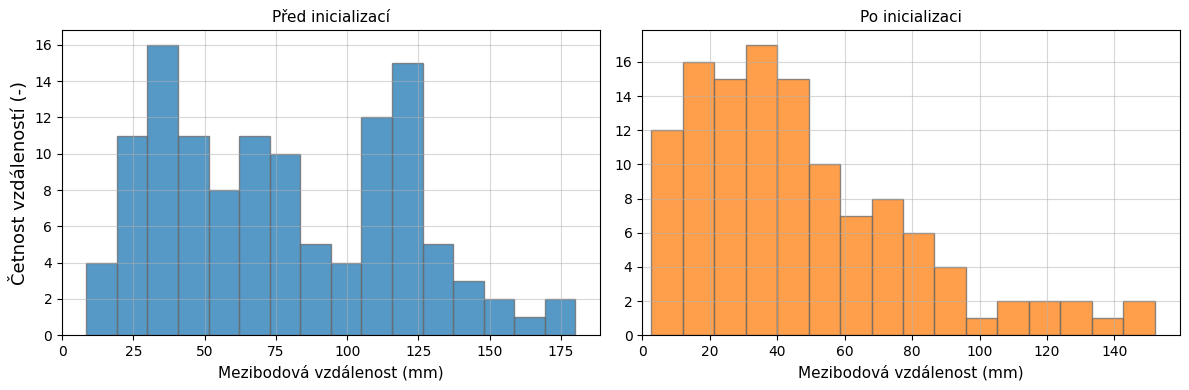

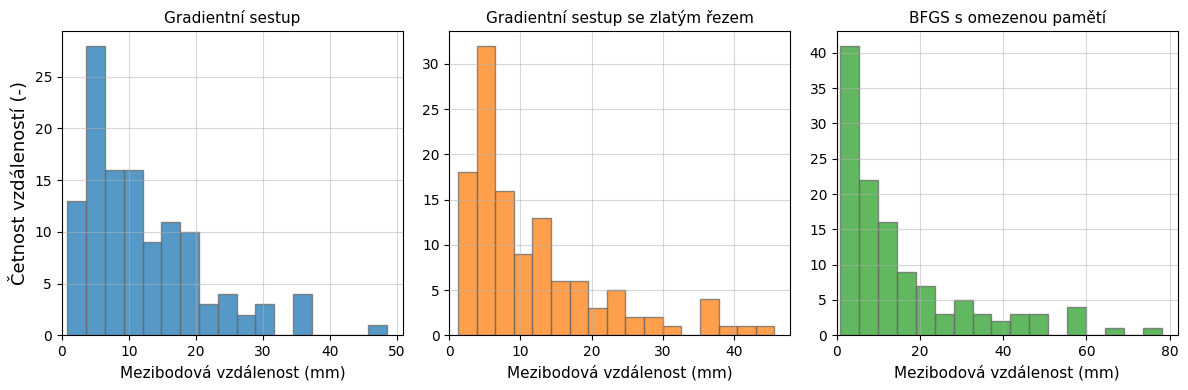

In [49]:
def plotErrorHist(error_values, reg_methods, hist_bins=(17, 17, 17), hist_type="initial", save=False):
    
    fig_hist, ax_hist = plt.subplots(1, error_values.shape[1], figsize=(12, 4))


    indexes = np.arange(0, error_values.shape[1])
    for ax, idx, method, color, hist_bin in zip(ax_hist.ravel(), indexes, reg_methods, colors, hist_bins):
        ax.hist(error_values[:, idx].ravel(), bins=hist_bin, alpha=0.75, color=color, 
                edgecolor="dimgray", linewidth=1.)
        ax.grid(alpha=0.5)
        # ax.set_yticks(np.arange(0, np.histogram(error_values[:, 1].ravel())[0][0] + 5, 5, dtype=int))
        #ax.set_xticks(np.arange(0, gradientErrors[:, 0].max() + 10, 20))
    #ax_hist.set_yticks(np.arange(0, np.histogram(gradientErrors[:, 2].ravel())[0][0], 10))
        ax.set_xlabel("Mezibodová vzdálenost (mm)", fontsize=11)
        ax.set_title(method, fontsize=11)
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
    ax_hist[0].set_ylabel("Četnost vzdáleností (-)", fontsize=13)
    # ax_hist.set_title("Rozložení míry nepřesností")
    # ax_hist.legend()
    fig_hist.tight_layout()
    plt.show()

    if save:
        fig_hist.savefig(f"input_files\\globalni_grafy\\{hist_type}Histogram.pdf", bbox_inches="tight")

print("Rozložení mezibodových vzdáleností napříč všemi pacienty podle registračních fází")
regMethods = ["Gradientní sestup", "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]

plotErrorHist(initialErrors, ["Před inicializací", "Po inicializaci"], 
               hist_bins=(16, 16), save=saveState)
plotErrorHist(lastIterErrors, regMethods, hist_bins=(17, 17, 17), hist_type="initial", save=saveState)

In [6]:
patientNumber = "01"
regDir = os.path.join(os.getcwd(), f"input_files\\pacient_{patientNumber}\\registration\\{regMethodDir}\\")

regInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}registrationInfo{view.upper()}.npz"))
errorsInfoFile = np.load(os.path.join(regDir, f"pacient{patientNumber}ErrorsInfo{view.upper()}.npz"))
colors = list(mcolors.TABLEAU_COLORS.values())
regInfo = {key: regInfoFile[key] for key in regInfoFile.files}
errorsInfo = {key: errorsInfoFile[key] for key in errorsInfoFile.files} 

metricValues = [np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradient\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientline\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"],
                np.load(f"input_files\\pacient_{patientNumber}\\registration\\gradientlbf\\"
                        f"pacient{patientNumber}registrationInfo{view.upper()}.npz")["metricValues"]]

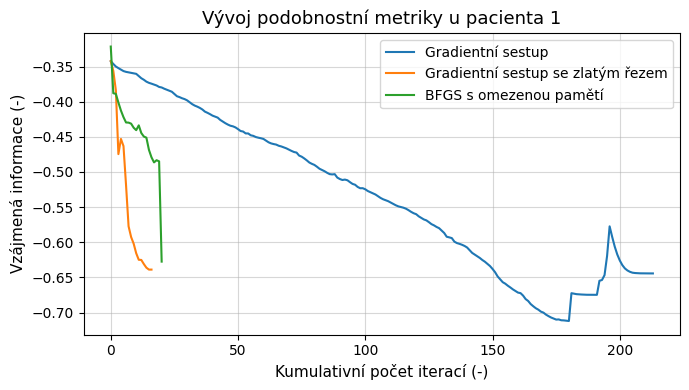

In [7]:
def plotAllMetrics(metric_values, pat_number, save=False):
    
    fig_metrics, ax_metrics = plt.subplots(1, 1, figsize=(7, 4))
    
    labels = ["Gradientní sestup", "Gradientní sestup se zlatým řezem", "BFGS s omezenou pamětí"]
    for values, label in zip(metric_values, labels):
        ax_metrics.plot(values, label=label)
    ax_metrics.legend()
    ax_metrics.grid(alpha=0.5)
    ax_metrics.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metrics.set_ylabel("Vzájmená informace (-)", fontsize=11)
    ax_metrics.set_title(f"Vývoj podobnostní metriky u pacienta {int(pat_number)}", fontsize=13)
    
    fig_metrics.tight_layout()
    plt.show()
    
    if save:
        fig_metrics.save()


plotAllMetrics(metricValues, patientNumber, save=saveState)

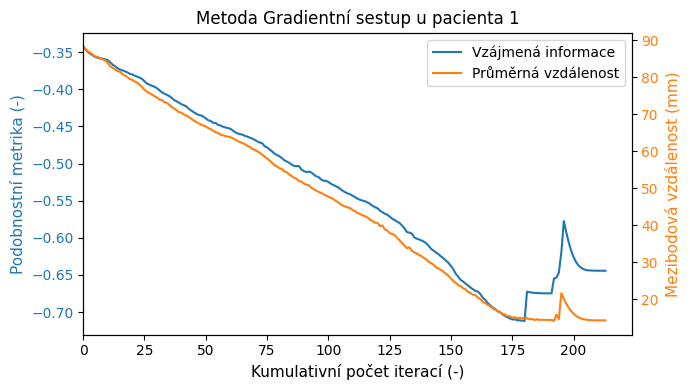

In [8]:
def plotMetricAndError(metric_values, mean_errors, multires_iters, 
                       reg_method, pat_number, save=False):
    
    fig_metric_tre, ax_metric_tre = plt.subplots(1, 1, figsize=(7, 4))
    twin1 = ax_metric_tre.twinx()
    
    color1 = "tab:blue"
    color2 = "tab:orange"
    iters = np.arange(0, len(metric_values))
    plot1, = ax_metric_tre.plot(iters, metric_values, color=color1, label="Vzájmená informace")
    plot2, = twin1.plot(iters, mean_errors, color=color2, label="Průměrná vzdálenost", ls="-")
    
    ax_metric_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric_tre.set_ylabel("Podobnostní metrika (-)", fontsize=11, color=color1)
    ax_metric_tre.tick_params(axis="y", labelcolor=color1)
    twin1.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11, color=color2)
    twin1.tick_params(axis="y", labelcolor=color2)
    
    """
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_ylim = ax_metric_tre.get_ylim()
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                       ax_ylim[0], # metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05
                                       ax_ylim[1], # metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05
                                       facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                       metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                       metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                       facecolor=colors[indx], alpha=0.6)
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.vlines(regInfo["multiresIters"], 
                         ax_metric_tre.get_ylim()[0], # metric_values[multires_iters] - 0.075 
                         ax_metric_tre.get_ylim()[1], # metric_values[multires_iters] + 0.075 
                         ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric_tre.annotate(f"{level}.", (multi_iter + 1, metric_values[multi_iter] + 0.001)) 
    """
    
    ax_metric_tre.set_xlim([0, None])
    ax_metric_tre.set_ylim([None, None])
    ax_metric_tre.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}")
    ax_metric_tre.legend(handles=[plot1, plot2])
    
    fig_metric_tre.tight_layout()
    plt.show()


plotMetricAndError(metricValues[0], errorsInfo["meanValues"], regInfo["multiresIters"], 
                   regMethod, patientNumber)

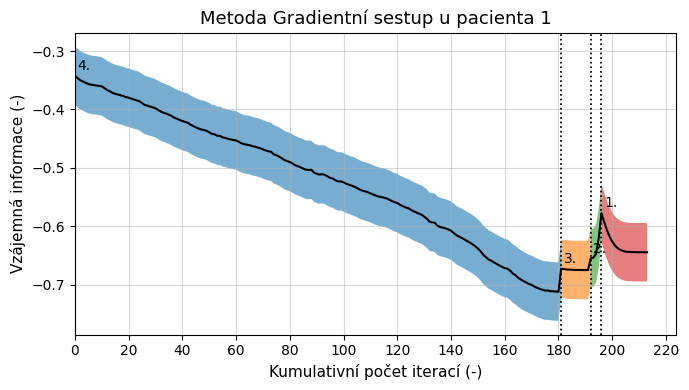

In [9]:
def plotMetricValues(metric_values, multires_iters, shrink_factors, smooth_sigmas,
                     pat_number, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    
    fig_metric, ax_metric = plt.subplots(1, 1, figsize=(7, 4))
    ax_metric.plot(iters, metric_values, label="Vzájemná informace", c="black")

    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_metric.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] - 0.05,
                                   metric_values[multi_iter:multires_iters[indx + 1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_metric.fill_between(iters[multi_iter:iters[-1] + 1],
                                   metric_values[multi_iter:iters[-1] + 1] - 0.05,
                                   metric_values[multi_iter:iters[-1] + 1] + 0.05,
                                   facecolor=colors[indx], alpha=0.6)
            
    ax_metric.set_xlim([0, None])
    ax_metric.set_ylim([None, None])
    ax_ylim = ax_metric.get_ylim()
    ax_xlim = ax_metric.get_xlim()
    ax_metric.vlines(multires_iters, 
                     ax_ylim[0], # metric_values[multires_iters] - 0.075 
                     ax_ylim[1], # metric_values[multires_iters] + 0.075 
                     ls="dotted", lw=1.25, colors="black")
    
    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_metric.annotate(f"{level}.", (multi_iter + 1,
                                         metric_values[multi_iter] + 0.01))
    # param_text = f"Parametry registračních úrovní:\n S = {shrink_factors}\n $\sigma^2$ = {smooth_sigmas}"
    # ax_metric.text(iters[4], -0.6, param_text, bbox=dict(edgecolor="k",
    #                                                      facecolor="none"))
    
    # ax_metric.set_xlim([0, None])
    # ax_metric.set_ylim([None, None])
        # ax_metric.annotate(f"{level}. S = {shrink}\n    $\sigma^2$ = {smooth}", 
        #                   (multi_iter + 2, ax_ylim[0] + 0.01))
    
    """
    # ax_ylim = ax_metric.get_ylim()
    # ax_metric.vlines(multires_iters, ax_ylim[0], ax_ylim[1], ls="--", colors="black")
            
    # 
    # ax_metric.fill_between(iters[multires_iters[0]:multires_iters[1] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[0]:multires_iters[1] + 1],
    #                  facecolor="red", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[1]:multires_iters[2] + 1], 
    #                     ax_ylim[0], 
    #                     metric_values[multires_iters[1]:multires_iters[2] + 1],
    #                  facecolor="blue", alpha=0.5)
    # ax_metric.fill_between(iters[multires_iters[2]:iters[-1] + 1], 
    #                     ax_ylim[0], 
    #                     ax_ylim[1],
    #                  facecolor="green", alpha=0.5)
    """
    ax_metric.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_metric.set_ylabel("Vzájemná informace (-)", fontsize=11)
    ax_metric.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}", fontsize=13)
    ax_metric.set_xticks(np.arange(0, len(metric_values) + 10, 20))
    ax_metric.grid(alpha=0.5)
    #ax_metric.legend()
    fig_metric.tight_layout()
    plt.show()
    
    if save:
        fig_metric.savefig(f"{regDir}pacient{patientNumber}MutInf{view.upper()}.pdf", bbox_inches="tight")


plotMetricValues(regInfo["metricValues"], regInfo["multiresIters"], 
                 regInfo["shrinkFactors"], regInfo["smoothingSigmas"], 
                 patientNumber, regMethod, save=saveState)

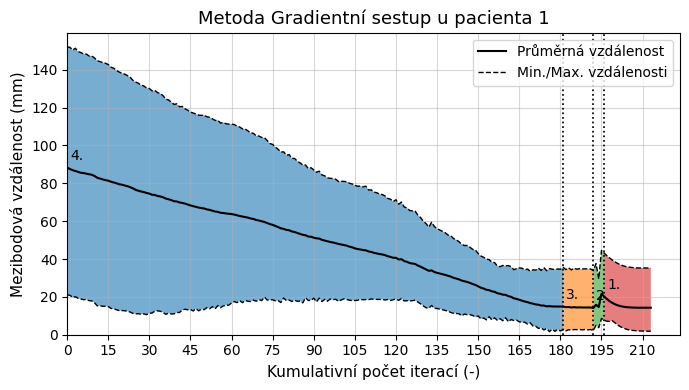

In [11]:
def plotRegistrationErrors(mean_errors, min_errors, max_errors, 
                           metric_values, multires_iters, 
                           pat_number, reg_method, save=False):
    iters = np.arange(0, len(metric_values))
    # Plot the TRE mean value and the [min-max] range.
    fig_tre, ax_tre = plt.subplots(1, 1, figsize=(7, 4))
    ax_tre.plot(iters, mean_errors, color="black", label="Průměrná vzdálenost")
    ax_tre.plot(iters, min_errors, c="black", ls="--", lw=1., label="Min./Max. vzdálenosti")
    ax_tre.plot(iters, max_errors, c="black", ls="--", lw=1.)
    
    for indx, multi_iter in enumerate(multires_iters):
        if multi_iter != multires_iters[-1]:
            ax_tre.fill_between(iters[multi_iter:multires_iters[indx + 1] + 1],
                                   min_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   max_errors[multi_iter:multires_iters[indx + 1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
        else:
            ax_tre.fill_between(iters[multi_iter:iters[-1] + 1],
                                   min_errors[multi_iter:iters[-1] + 1],
                                   max_errors[multi_iter:iters[-1] + 1],
                                   facecolor=colors[indx], alpha=0.6)
    ax_tre.set_xlim([0, None])
    ax_tre.set_ylim([0, None])
    ax_ylim = ax_tre.get_ylim()
    ax_tre.vlines(multires_iters, ax_ylim[0], ax_ylim[1], 
                  ls="dotted", lw=1.25, colors="black") # min_errors[multires_iters], max_errors[multires_iters], 

    levels = [level for level in range(len(multires_iters), 0, -1)]
    for level, multi_iter in zip(levels, multires_iters):
        ax_tre.annotate(f"{level}.", (multi_iter + 1, mean_errors[multi_iter] + 4))

    ax_tre.set_xlabel("Kumulativní počet iterací (-)", fontsize=11)
    ax_tre.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    ax_tre.set_title(f"Metoda {reg_method} u pacienta {int(pat_number)}", fontsize=13)
    ax_tre.set_xticks(np.arange(0, len(metric_values) + 10, 15))
    #ax_tre.set_yticks(np.arange(0, max_errors.max(), 10))
    # ax_tre.set_xlim([0, None])
    # ax_tre.set_ylim([0, None])
    ax_tre.grid(alpha=0.5)
    ax_tre.legend()
    fig_tre.tight_layout()
    
    plt.show()
    
    if save:
        fig_tre.savefig(f"{regDir}pacient{patientNumber}Tre{view.upper()}.pdf", bbox_inches="tight")


plotRegistrationErrors(errorsInfo["meanValues"], errorsInfo["minValues"], 
                       errorsInfo["maxValues"], regInfo["metricValues"], 
                       regInfo["multiresIters"], patientNumber, regMethod, save=saveState)

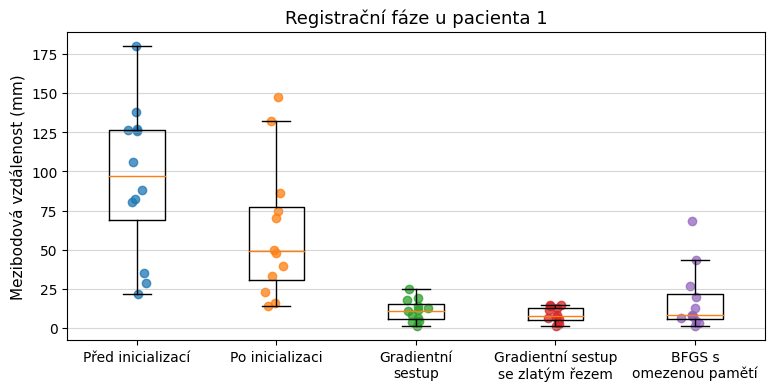

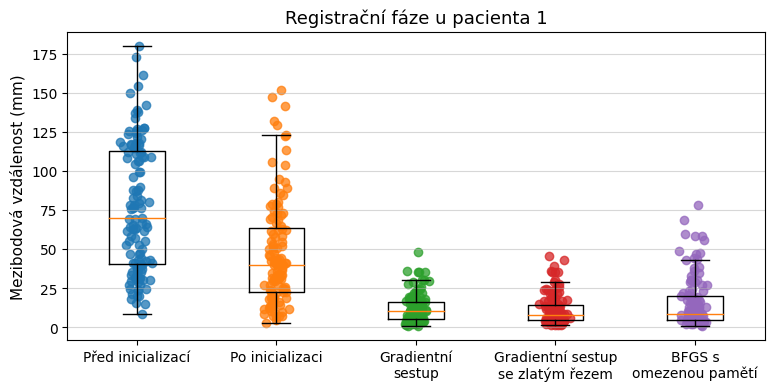

In [29]:
def plotPatientErrorBox(patient_errors, reg_stages, pat_number, save=False):
    fig_box, ax_box = plt.subplots(1, 1, figsize=(9, 4))

    ax_box.boxplot(patient_errors, labels=reg_stages, widths=0.4, showfliers=False)
    scatter_xaxis = []
    for indx, col in enumerate(range(patient_errors.shape[1])):
        scatter_xaxis.append(np.random.normal(indx + 1, 0.04, size=patient_errors.shape[0]))
    
    for xaxis, values, color in zip(scatter_xaxis, patient_errors.T, palette):
        ax_box.scatter(xaxis, values, c=color, alpha=0.75)
    
    ax_box.yaxis.grid(True, alpha=0.5)
    ax_box.set_title(f"Registrační fáze u pacienta {int(pat_number)}", fontsize=13)
    ax_box.set_ylabel("Vzdálenost mezi páry bodů (mm)", fontsize=11)
    ax_box.set_ylabel("Mezibodová vzdálenost (mm)", fontsize=11)
    plt.show()

    if save:
        fig_box.savefig(f"{regDir}pacient{pat_number}Hist{view.upper()}.pdf", bbox_inches="tight")
        

palette = colors[:5]
patientErrors = np.array([initialErrors[:, 0, int(patientNumber)],
                          initialErrors[:, 1, int(patientNumber)],
                          lastIterErrors[:, 0, int(patientNumber)],
                          lastIterErrors[:, 1, int(patientNumber)],
                          lastIterErrors[:, 2, int(patientNumber)]]).T
allLastPatientErrors = np.array([initialErrors[:, 0, :].ravel(),
                                 initialErrors[:, 1, :].ravel(),
                                 lastIterErrors[:, 0, :].ravel(),
                                 lastIterErrors[:, 1, :].ravel(),
                                 lastIterErrors[:, 2, :].ravel()]).T
plotPatientErrorBox(patientErrors, regStages, patientNumber, save=saveState)
plotPatientErrorBox(allLastPatientErrors, regStages, patientNumber, save=saveState)
